In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
%matplotlib widget

In [2]:
path1 = 'data_output' # data folder
path2 = 'num_output' # num folder
data_files = sorted(glob.glob(os.path.join(path1, "*.npz")), key=lambda x: int(x.split("_")[-1].split(".")[0]))
num_files = sorted(glob.glob(os.path.join(path2, "*.npz")), key=lambda x: int(x.split("_")[-1].split(".")[0]))
print(len(data_files))
print(len(num_files))

427
427


In [3]:
# data
data = np.concatenate([np.load(d)['data'] for d in data_files], axis=0).view('int8')
data_shape = data.shape
print('data shape is:', data_shape)

# num
num = np.concatenate([np.load(n)['data'] for n in num_files], axis=0).view('int8')
num_shape = num.shape
print('num shape is:', num_shape)


data shape is: (854, 2048)
num shape is: (874496,)


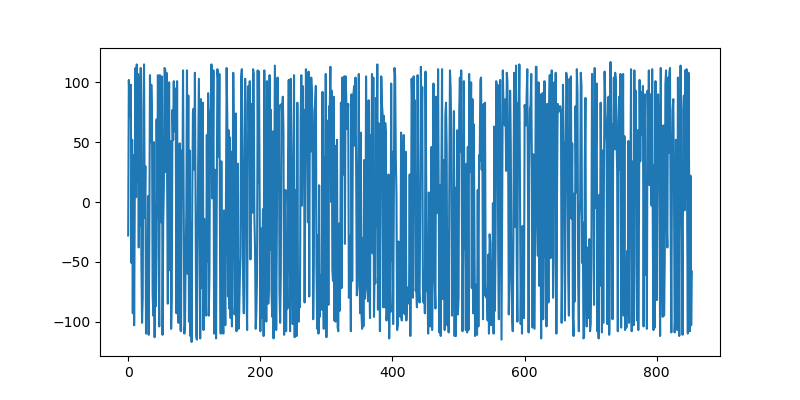

In [4]:
plt.figure(figsize=(8,4))
plt.plot(data[:,0])
# for checking specific number of files
#for i in range(1):
#    data = np.load(data_files[i])['data'].view('int8')
#    print(data.shape)
#    plt.plot(data[:,0])

#plt.xlim(1500,2500)
plt.show()

[ 0  1  2 ... -3 -2 -1]


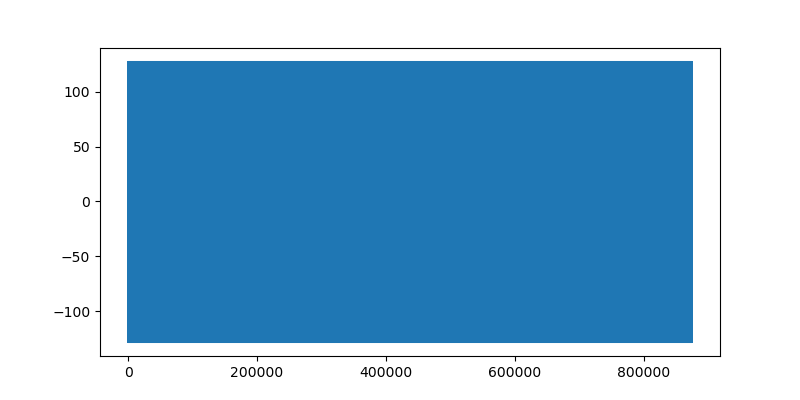

In [5]:
plt.figure(figsize=(8,4))
plt.plot(num)
print(num)
plt.show()

In [ ]:
plt.close('all')